# Week 3: Excercise 3.2
File: RattanavilayThip_Excercise_3.2_Ch.1_1.1_1.2_Ch.2_2.1_2.4<br>
Name: Thip Rattanavilay<br>
Date: 12/19/2020<br>
Course: DSC 530 Data Exploration and Analysis<br>
Assignment: Chapter 1: 1.1, 1.2<br>
Assignment: Chapter 2: 2.1, 2.4<br>

## Chapter 1: Excercise 1.1

### Directions:

#### Read NSFG data into a Pandas DataFrame.

In [35]:
from __future__ import print_function, division

import nsfg

In [36]:
#Print the column names
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [37]:
#Select a single column name
preg.columns[1]

'pregordr'

In [ ]:
#Select a column and check what type it is
pregordr = preg['pregordr']
type(pregordr)

In [38]:
#Print a column
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [39]:
#Select a single element from a column.
pregordr[0]

1

In [40]:
#Select a slice from a column.
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

In [45]:
#Select a column using dot notation.
pregordr = preg.pregordr

In [42]:
#Count the number of times each value occurs.
preg.outcome.value_counts().sort_index()

1    9148
Name: outcome, dtype: int64

In [43]:
#Check the values of another variable.
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [44]:
#Make a dictionary that maps from each respondent's caseid to a list of indices into the pregnancy DataFrame. 
#Use it to select the pregnancy outcomes for a single respondent.
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values


array([1])


## Chapter 1: Excercise 1.2


 
### Directions: 
Exercise 1.2 In the repository you downloaded, you should find a file named chap01ex.py; using this file as a 
starting place, write a function that reads the respondent file, 2002FemResp.dat.gz. The variable pregnum is 
a recode that indicates how many times each respondent has been pregnant. Print the value counts for this variable 
and compare them to the published results in the NSFG codebook. You can also cross-validate the respondent 
and pregnancy files by comparing pregnum for each respondent with the number of records in the pregnancy file. 
You can use nsfg.MakePregMap to make a dictionary that maps from each caseid to a list of indices into the 
pregnancy DataFrame.



In [8]:
import numpy as np
import pandas as pd
import nsfg
import thinkstats2


## Read in the data

In [10]:
def ReadFemResp(file1, file2, nrows=None):
    """ This function takes the dct and dat files (NSFG respondent data),
    reads them and returns a dataframe of the data.

    :param file1: (str) dct filename
    :param file2: (str) dat filename
    :param nrows: option
    :return: df - dataframe of NSFG respondent data
    """
    dct = thinkstats2.ReadStataDct(file1)
    df = dct.ReadFixedWidth(file2, compression="gzip", nrows=nrows)

    return df

dct_file='2002FemResp.dct'
dat_file = '2002FemResp.dat.gz'
resp_df = ReadFemResp(dct_file, dat_file)
resp_df.head()




,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667



## Count pregnancies and cross-validate


In [12]:
def PregnumCheck(df):
    # This function counts the number of pregnancies and
        # cross-validate the respondent and pregnancy files by comparing
        # pregnum for each respondent with the number of records in the
        # pregnancy file (df)

    #:param df: dataframe of NSFG respondent data
   
    # data series of: index (# of pregnancies) | values (participants)
    preg_num = df.pregnum.value_counts().sort_index()

    # sum of pregnancy respondents
    total = df.pregnum.value_counts().sum()

    # used for higher # of pregnancies
    count = 0

    # loop through the preg_num data series to print statement
    # formatted for comparison to NSFG codebook
    print("***** Pregnancy Data *****")
    for index, value in preg_num.items():
        if index < 7:
            print("{} pregnancies = {} respondents".format(index, value))
        else:
            count += value
    else:
        print("7 or more pregnancies = {} respondents".format(count))

    # cross-validation
    if total == len(df):
        print("***** cross-validation *****")
        print("The respondents match the pregnancy data, which is: {}".format(total))

PregnumCheck(resp_df)


***** Pregnancy Data *****
0 pregnancies = 2610 respondents
1 pregnancies = 1267 respondents
2 pregnancies = 1432 respondents
3 pregnancies = 1110 respondents
4 pregnancies = 611 respondents
5 pregnancies = 305 respondents
6 pregnancies = 150 respondents
7 or more pregnancies = 158 respondents
***** cross-validation *****
The respondents match the pregnancy data, which is: 7643


 # Chapter 2: Excercise 2.1 

## Directions: <br>

### Exercise 2.1
Based on the results in this chapter, suppose you were asked to summarize 
what you learned about whether first babies arrive late. Which summary statistics would 
you use if you wanted to get a story on the evening news? Which ones would you use if 
you wanted to reassure an anxious patient?<br> <br>

To reassure an anxious patient I would use the standard deviation. I would also put it 
into contex for them so they understood the impact. To make the evening news I would 
probably use the mean. However, I would also want to include outliers inorder to get 
extreme values.

Finally, imagine that you are Cecil Adams, author of The Straight Dope (http://straightdope.com), 
and your job is to answer the question, “Do first babies arrive late?” Write a paragraph 
that uses the results in this chapter to answer the question clearly, precisely, and honestly.

From the 7643 participants in the National Survey of Family Growth (NSFG), we can 
finally answer whether first babies arrive late! So, do they? Yes... and no, our research
indicates that it depends. There is no hard evident to support that first born babies will 
always arrive late. A standard deviation of 0.029 was determined between first born and 
non-first born babies; which is fairly insignificant. With additional data we can continue 
to minimize the standard deviation. Further studies and funding can provide additional 
insight how often first born babies arrive late. 

# Chapter 2: Excercise 2.4

## Directions:<br>
### Exercise 2.4 
Using the variable totalwgt_lb, investigate whether first babies are lighter 
or heavier than others. Compute Cohen’s d to quantify the difference between the groups. 
How does it compare to the difference in pregnancy length?




In [24]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot
import math

### Read in data

In [25]:
# Read in the dataset
df = nsfg.ReadFemPreg()
preg = df[df.outcome == 1]
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [26]:
# filter dataframe for cols of interest (easier to work with)
preg_filtered = preg.filter(items = ["caseid", "outcome", "birthord", 
"prglngth", "totalwgt_lb"])
preg_filtered.head()

,caseid,outcome,birthord,prglngth,totalwgt_lb
0,1,1,1.0,39,8.8125
1,1,1,2.0,39,7.8750
2,2,1,1.0,39,9.1250
3,2,1,2.0,39,7.0000
4,2,1,3.0,39,6.1875


In [27]:
# split preg_filtered to get first babies
first = preg_filtered[preg_filtered.birthord == 1]
first.head()

,caseid,outcome,birthord,prglngth,totalwgt_lb
0,1,1,1.0,39,8.8125
2,2,1,1.0,39,9.1250
5,6,1,1.0,38,8.5625
8,7,1,1.0,39,7.5625
10,12,1,1.0,39,7.8125


In [28]:
# split preg_filtered to get other babies
other = preg_filtered[preg_filtered.birthord != 1]
other.head()


,caseid,outcome,birthord,prglngth,totalwgt_lb
1,1,1,2.0,39,7.8750
3,2,1,2.0,39,7.0000
4,2,1,3.0,39,6.1875
6,6,1,2.0,40,9.5625
7,6,1,3.0,42,8.3750


### Histogram

Text(0, 0.5, 'Frequency')

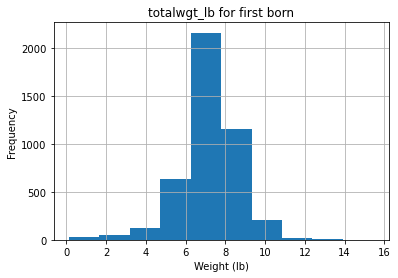

In [29]:
hist_plot = first["totalwgt_lb"].hist()
hist_plot.set_title("totalwgt_lb for first born")
hist_plot.set_xlabel("Weight (lb)")
hist_plot.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

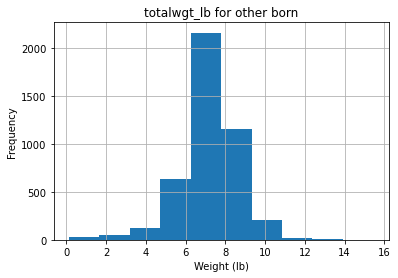

In [30]:
hist_plot = first["totalwgt_lb"].hist()
hist_plot.set_title("totalwgt_lb for other born")
hist_plot.set_xlabel("Weight (lb)")
hist_plot.set_ylabel("Frequency")

### Cohen's d Calculation

In [31]:
# function for cohens d
def CohenD(f, o, col):
    """ function calc the cohen's d statistic 

    @param: f (dataframe) - first babies
    @param: o (dataframe) - other babies
    @param: col (str) - column of interest 
    returns: d (float) - cohens d rounded to 4 sig. figs
    """
    diff = f[col].mean() - o[col].mean()

    var1 = f[col].var()
    var2 = o[col].var()
    n1, n2 = len(f), len(o)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)

    return round(d, 4)

In [32]:
# cohen's d for totalwgt_lb
cohen_d = CohenD(first, other, "totalwgt_lb")
cohen_d

-0.0887

In [33]:
# cohen's d for prglngth
cohen_d = CohenD(first, other, "prglngth")
cohen_d

0.0289

### Cohen's d Summary<br>
The cohen's d value for totalwgt_lb gives us a value of -0.0887. The cohen's d value for prglngth gives us a values of 0.0289. This tells us the pregnency length does not vary much between first and other born babies. However, the totalwgt_lb varies about three times as much compared to prglength.